## Data Import and Matrix Split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Fill in gender in R1 and R2 matrix

In [2]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_R1_R2_on_0702clean_data.csv')

In [3]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_0702.csv')
Y1 = df.loc[:, 'UniqueID':'t39_combo']
Y1['Gender'] = df['Gender']

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,...,Age,Date,Gender,GRYD_Zone,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_White,Ethnicity_Other,RiskFactor
0,0,851,3538.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,...,13.0,2009-11-12,1.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0
1,3,869,3552.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,...,14.0,2009-11-16,2.0,5.0,0.0,0.0,1.0,0.0,0.0,7.0
2,6,892,3569.0,3.0,5.0,4.0,1.0,4.0,2.0,5.0,...,13.0,2009-11-17,1.0,17.0,0.0,0.0,1.0,0.0,0.0,7.0
3,9,895,3570.0,3.0,4.0,2.0,3.0,4.0,3.0,3.0,...,10.0,2009-11-18,1.0,17.0,1.0,0.0,0.0,0.0,0.0,5.0
4,12,919,3586.0,4.0,4.0,5.0,5.0,4.0,1.0,3.0,...,11.0,2009-11-19,2.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0


In [5]:
df = pd.read_csv('Intersection_Y1R1R2_0702R1_0702.csv')
R1 = df.loc[:, 'UniqueID':'t39_combo']
R1['Gender'] = df['Gender']

In [6]:
df = pd.read_csv('Intersection_Y1R1R2_0702R2_0702.csv')
R2 = df.loc[:, 'UniqueID':'t39_combo']
R2['Gender'] = df['Gender']

In [7]:
# change all nan gender values in R1 according to their values in Y1

for index in R1.index:
    if pd.isnull(R1.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R1.loc[index, 'Gender'] = gender

In [8]:
# change all nan gender values in R2 according to their values in Y1

for index in R2.index:
    if pd.isnull(R2.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R2.loc[index, 'Gender'] = gender

In [9]:
Gender_Incos = []
for index in Y1.index:
    if (Y1.loc[index, 'Gender'] != R1.loc[index, 'Gender']) or (R1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) or (Y1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) :
        Gender_Incos.append(Y1.loc[index, 'UniqueID'])

### Drop IDs with Nan values

In [10]:
#indices
columns = Y1.columns.tolist()
columns = columns[:-1]

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(Y1[Y1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list = list(my_set)
unique_index_list

[]

In [11]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R1[R1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list1 = list(my_set)
unique_index_list1

[512, 770, 169, 624, 402, 56, 1087, 927]

In [12]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R2[R2[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list2 = list(my_set)
unique_index_list2

[1297, 182, 347, 446, 763]

In [13]:
#make list of UniqueIDs associated with these NaN values
ID_list = []
for i in unique_index_list1:
    ID_list.append(R1.loc[i,'UniqueID'])
ID_list

[14334.0, 17710.0, 11189.0, 16486.0, 12668.0, 4960.0, 25920.0, 22418.0]

In [14]:
#make list of UniqueIDs associated with these NaN values
for i in unique_index_list2:
    ID_list.append(R2.loc[i,'UniqueID'])
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0]

In [15]:
ID_list.extend(Gender_Incos)

In [16]:
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0,
 5957.0,
 6183.0,
 11177.0,
 11195.0,
 11218.0,
 11394.0,
 11419.0,
 11752.0,
 12926.0,
 12952.0,
 13071.0,
 17040.0,
 17651.0,
 17851.0,
 17959.0,
 21493.0,
 22624.0,
 28767.0,
 29298.0,
 29415.0,
 29542.0,
 29704.0,
 31457.0,
 31947.0,
 32298.0,
 33616.0,
 34230.0,
 41607.0,
 43947.0]

In [17]:
#drop these IDs from the data
for id in ID_list:
    Y1 = Y1[Y1['UniqueID']!=id]

In [18]:
#drop these IDs from the data
for id in ID_list:
    R1 = R1[R1['UniqueID']!=id]

In [19]:
#drop these IDs from the data
for id in ID_list:
    R2 = R2[R2['UniqueID']!=id]

## Split each matrix by Gender

In [20]:
Y1_M = Y1[Y1['Gender'] == 1]
Y1_F = Y1[Y1['Gender'] == 2]
Y1_M = Y1_M.drop('UniqueID', axis=1)
Y1_F = Y1_F.drop('UniqueID', axis=1)
Y1_M = Y1_M.drop('Gender', axis=1)
Y1_F = Y1_F.drop('Gender', axis=1)
Y1_M = Y1_M.transpose()
Y1_F = Y1_F.transpose()

In [21]:
Y1_M.shape

(39, 1007)

In [22]:
Y1_F.shape

(39, 627)

In [23]:
R1_M = R1[R1['Gender'] == 1]
R1_F = R1[R1['Gender'] == 2]
R1_M = R1_M.drop('UniqueID', axis=1)
R1_F = R1_F.drop('UniqueID', axis=1)
R1_M = R1_M.drop('Gender', axis=1)
R1_F = R1_F.drop('Gender', axis=1)
R1_M = R1_M.transpose()
R1_F = R1_F.transpose()
R1_M.shape

(39, 1007)

In [24]:
R1_F.shape

(39, 627)

In [25]:
R2_M = R2[R2['Gender'] == 1]
R2_F = R2[R2['Gender'] == 2]
R2_M = R2_M.drop('UniqueID', axis=1)
R2_F = R2_F.drop('UniqueID', axis=1)
R2_M = R2_M.drop('Gender', axis=1)
R2_F = R2_F.drop('Gender', axis=1)
R2_M = R2_M.transpose()
R2_F = R2_F.transpose()
R2_M.shape

(39, 1007)

## DMD for Gender

### Y1 to R1

#### Female Y1 to R1

In [26]:
U_Y1F,Sig_Y1F,V_Y1F=np.linalg.svd(Y1_F, full_matrices=False)    
U_Y1F_T=U_Y1F.conjugate().transpose()
V_Y1F_T=V_Y1F.conjugate().transpose()
Sig_inv_Y1F=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_Y1F[i][j]=1/Sig_Y1F[i]

In [27]:
A_step1=np.dot(R1_F,V_Y1F_T)
A_step2=np.dot(A_step1,Sig_inv_Y1F)
A_Y1F_R1=np.dot(A_step2,U_Y1F_T)
A_Y1F_R1

array([[ 0.20634958,  0.04586469, -0.03899899, ...,  0.00588326,
         0.02480885,  0.01531335],
       [ 0.02341181,  0.35664329,  0.15138468, ...,  0.00579174,
         0.06743717, -0.03740279],
       [-0.01436055,  0.03036344,  0.19343604, ..., -0.01860408,
         0.05892104, -0.02464549],
       ...,
       [ 0.00796545,  0.0704354 ,  0.05682137, ...,  0.31168465,
         0.0573235 ,  0.02435626],
       [-0.03421194,  0.07781099,  0.05769253, ...,  0.10811039,
         0.34417543,  0.0122536 ],
       [-0.03744888,  0.10515188, -0.03182763, ...,  0.10621194,
         0.05321658,  0.55004158]])

In [28]:
values_Y1_F, vectors_Y1_F = np.linalg.eig(A_Y1F_R1)

In [29]:
eiglog_Y1_F = np.log(values_Y1_F)

In [30]:
lamphi_Y1_F=np.zeros(39)
for i in range (39):
    rep=vectors_Y1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_F[i])*norm
    lamphi_Y1_F[i]=val

#### Male Y1 to R1

In [31]:
U_Y1M,Sig_Y1M,V_Y1M=np.linalg.svd(Y1_M, full_matrices=False)    
U_Y1M_T=U_Y1M.conjugate().transpose()
V_Y1M_T=V_Y1M.conjugate().transpose()
Sig_inv_Y1M=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_Y1M[i][j]=1/Sig_Y1M[i]

In [32]:
A_step1=np.dot(R1_M,V_Y1M_T)
A_step2=np.dot(A_step1,Sig_inv_Y1M)
A_Y1M_R1=np.dot(A_step2,U_Y1M_T)
A_Y1M_R1

array([[ 0.23025215,  0.01161598,  0.01160419, ..., -0.02528911,
         0.03551373, -0.02808761],
       [ 0.00717195,  0.31694302,  0.01607952, ...,  0.0276894 ,
        -0.00440583, -0.04841484],
       [ 0.0608291 ,  0.00352408,  0.1909861 , ..., -0.03635287,
         0.02633006, -0.03282269],
       ...,
       [-0.02622658,  0.04450752,  0.01263083, ...,  0.24728159,
         0.06016462,  0.02610486],
       [-0.020992  , -0.06231359,  0.01944343, ...,  0.06812623,
         0.30004255,  0.0814374 ],
       [-0.04891803, -0.09516133,  0.03104903, ...,  0.05308804,
         0.05669614,  0.4252041 ]])

In [33]:
values_Y1_M, vectors_Y1_M = np.linalg.eig(A_Y1M_R1)

In [34]:
eiglog_Y1_M = np.log(values_Y1_M)

In [35]:
lamphi_Y1_M=np.zeros(39)
for i in range (39):
    rep=vectors_Y1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_M[i])*norm
    lamphi_Y1_M[i]=val

### R1 to R2

#### Female R1 to R2

In [36]:
U_R1F,Sig_R1F,V_R1F=np.linalg.svd(R1_F, full_matrices=False)    
U_R1F_T=U_R1F.conjugate().transpose()
V_R1F_T=V_R1F.conjugate().transpose()
Sig_inv_R1F=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_R1F[i][j]=1/Sig_R1F[i]

In [37]:
A_step1=np.dot(R2_F,V_R1F_T)
A_step2=np.dot(A_step1,Sig_inv_R1F)
A_R1F_R2=np.dot(A_step2,U_R1F_T)
A_R1F_R2

array([[ 0.23039656,  0.12013833,  0.08996703, ...,  0.1188502 ,
        -0.00653452,  0.01496301],
       [-0.07372447,  0.3916294 ,  0.07058952, ...,  0.26362617,
         0.01474568,  0.0241626 ],
       [-0.03564368,  0.10731149,  0.2827374 , ...,  0.07895226,
        -0.03868288, -0.02706678],
       ...,
       [ 0.01071787,  0.03653523,  0.02022957, ...,  0.4119412 ,
         0.01108825,  0.0161458 ],
       [-0.04672553,  0.03058552, -0.06231778, ...,  0.22134061,
         0.22382435,  0.02929741],
       [ 0.0044084 ,  0.02753628, -0.06783619, ...,  0.1468159 ,
         0.00495651,  0.53244551]])

In [38]:
values_R1_F, vectors_R1_F = np.linalg.eig(A_R1F_R2)

In [39]:
eiglog_R1_F = np.log(values_R1_F)

In [40]:
lamphi_R1_F=np.zeros(39)
for i in range (39):
    rep=vectors_R1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_F[i])*norm
    lamphi_R1_F[i]=val

#### Male R1 to R2

In [41]:
U_R1M,Sig_R1M,V_R1M=np.linalg.svd(R1_M, full_matrices=False)    
U_R1M_T=U_R1M.conjugate().transpose()
V_R1M_T=V_R1M.conjugate().transpose()
Sig_inv_R1M=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_R1M[i][j]=1/Sig_R1M[i]

In [42]:
A_step1=np.dot(R2_M,V_R1M_T)
A_step2=np.dot(A_step1,Sig_inv_R1M)
A_R1M_R2=np.dot(A_step2,U_R1M_T)
A_R1M_R2

array([[ 2.05037775e-01,  1.43739553e-01,  5.66808271e-02, ...,
         1.04576112e-01,  7.58337952e-03,  2.22083366e-03],
       [-2.14142201e-02,  4.01439440e-01,  1.94286720e-01, ...,
         9.74481259e-02, -3.55031935e-02,  3.59330612e-02],
       [ 1.07762628e-02,  1.31678832e-01,  2.69633092e-01, ...,
         1.06580703e-01,  2.57167761e-02,  2.84069840e-02],
       ...,
       [ 1.77519076e-02,  6.58652891e-02,  3.50803722e-03, ...,
         2.84489122e-01,  3.07438055e-02,  2.02609185e-02],
       [ 6.71081377e-03,  4.25467193e-04, -5.72287080e-02, ...,
         1.67957396e-01,  3.83027252e-01,  4.32761697e-02],
       [-6.80662001e-02, -1.59689515e-02,  2.02515027e-04, ...,
         1.79612022e-01,  3.50193278e-02,  5.07501679e-01]])

In [43]:
values_R1_M, vectors_R1_M = np.linalg.eig(A_R1M_R2)

In [44]:
eiglog_R1_M = np.log(values_R1_M)

In [45]:
lamphi_R1_M=np.zeros(39)
for i in range (39):
    rep=vectors_R1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_M[i])*norm
    lamphi_R1_M[i]=val

## Graphs

In [46]:
label=['a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'b7', 'b8',
       'b9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'de17', 'de18',
       'de19', 'de20', 'f21', 'f22', 'f23o',
       'f24', 'f25', 'f26', 'g27', 'g28',
       'g29', 'g30', 'g31', 'h32', 'h33',
       'h34', 'h35', 'h36', 'h37', 't38',
       't39']

### PLOTs between real and imaginary parts of log(eigenvalues)

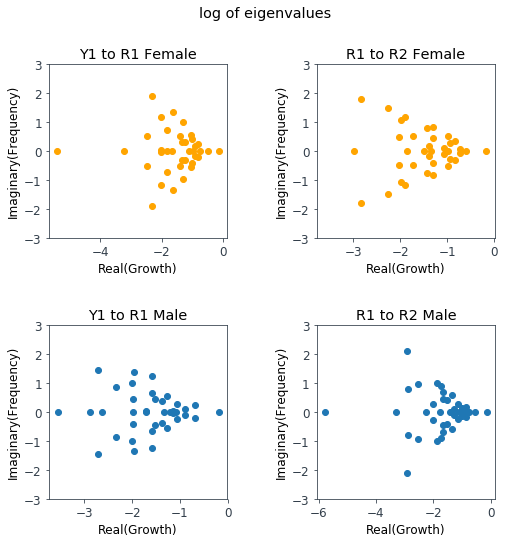

In [56]:
font = {'family' : 'DejaVu Sans',
  'size' : 12}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8

# Y1 to R1 Female 
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.scatter(eiglog_Y1_F.real,eiglog_Y1_F.imag, color = 'orange')
ax0.set_ylim([-3,3])
ax0.set_xlabel('Real(Growth)')
ax0.set_ylabel('Imaginary(Frequency)')

# R1 to R2 Female 
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.scatter(eiglog_R1_F.real,eiglog_R1_F.imag, color = 'orange')
ax1.set_ylim([-3,3])
ax1.set_xlabel('Real(Growth)')
ax1.set_ylabel('Imaginary(Frequency)')

# Y1 to R1 Male
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.scatter(eiglog_Y1_M.real,eiglog_Y1_M.imag)
ax2.set_ylim([-3,3])
ax2.set_xlabel('Real(Growth)')
ax2.set_ylabel('Imaginary(Frequency)')

# R1 to R2 Male
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.scatter(eiglog_R1_M.real,eiglog_R1_M.imag)
ax3.set_ylim([-3,3])
ax3.set_xlabel('Real(Growth)')
ax3.set_ylabel('Imaginary(Frequency)')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('log of eigenvalues')

plt.show()

### PLOTs between growth and lamda * phi

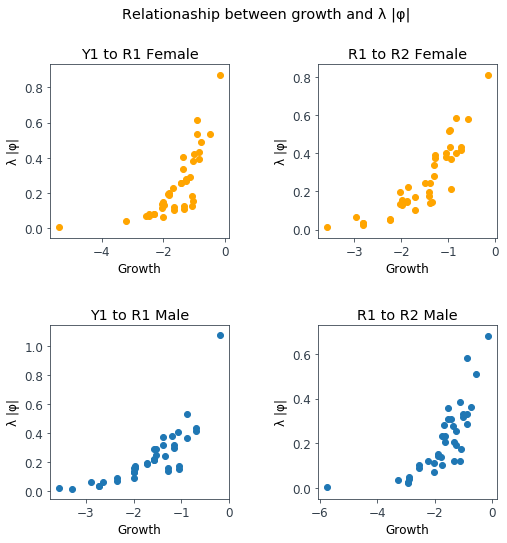

In [57]:
font = {'family' : 'DejaVu Sans',
  'size' : 12}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8

# Y1 to R1 Female 
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.scatter(eiglog_Y1_F.real,lamphi_Y1_F, color = 'orange')
ax0.set_xlabel('Growth')
ax0.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Female 
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.scatter(eiglog_R1_F.real,lamphi_R1_F, color = 'orange')
ax1.set_xlabel('Growth')
ax1.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# Y1 to R1 Male 
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.scatter(eiglog_Y1_M.real,lamphi_Y1_M)
ax2.set_xlabel('Growth')
ax2.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Male 
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.scatter(eiglog_R1_M.real,lamphi_R1_M)
ax3.set_xlabel('Growth')
ax3.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('Relationaship between growth and 'u'\u03BB' ' |' u'\u03C6''|')

plt.show()

### PLOTs between frequency and lamda * phi

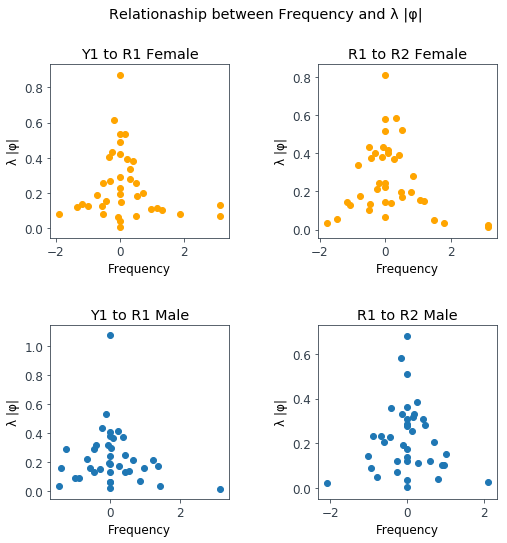

In [55]:
font = {'family' : 'DejaVu Sans',
  'size' : 12}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8

# Y1 to R1 Female 
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.scatter(eiglog_Y1_F.imag,lamphi_Y1_F, color = 'orange')
ax0.set_xlabel('Frequency')
ax0.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Female 
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.scatter(eiglog_R1_F.imag,lamphi_R1_F, color = 'orange')
ax1.set_xlabel('Frequency')
ax1.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# Y1 to R1 Male 
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.scatter(eiglog_Y1_M.imag,lamphi_Y1_M)
ax2.set_xlabel('Frequency')
ax2.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Male 
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.scatter(eiglog_R1_M.imag,lamphi_R1_M)
ax3.set_xlabel('Frequency')
ax3.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('Relationaship between Frequency and 'u'\u03BB' ' |' u'\u03C6''|')

plt.show()

### PLOTs for dominant eigen vectors

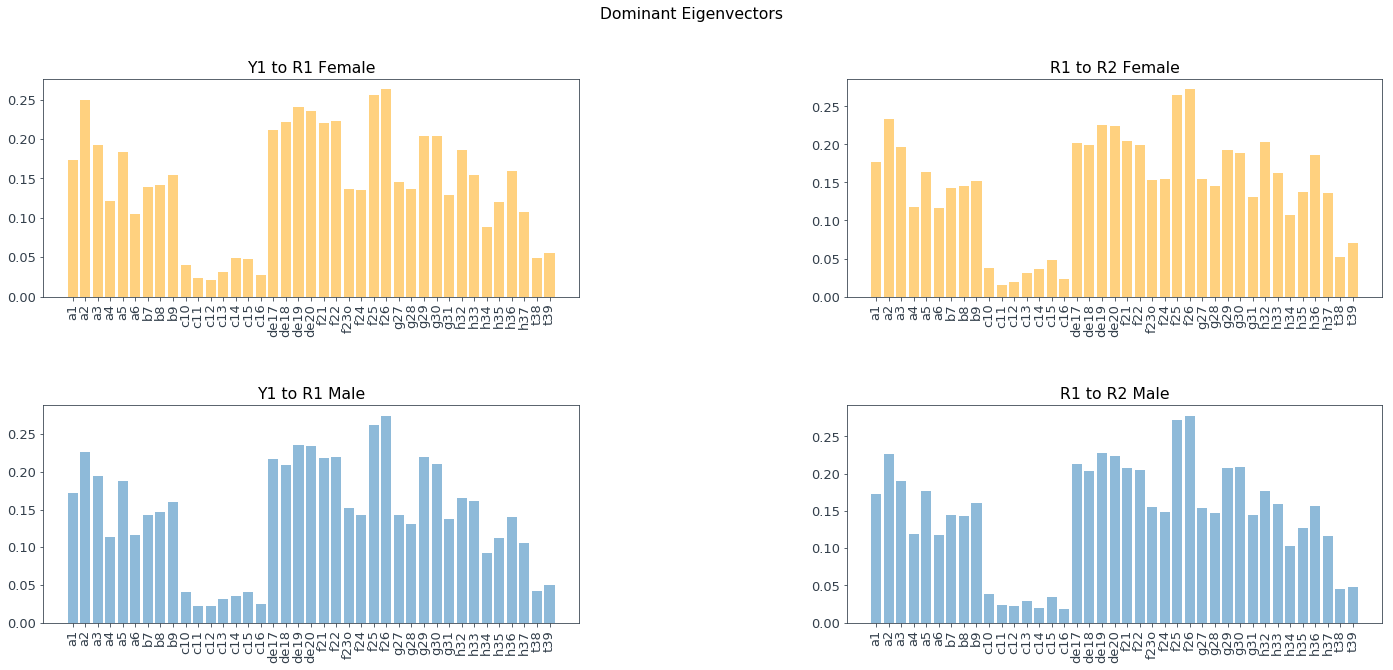

In [59]:
font = {'family' : 'DejaVu Sans',
  'size' : 13}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 10

# Y1 to R1 Female
index=np.zeros(39)
weiabs_Y1F=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_Y1F[j]=vectors_Y1_F[j,0].real
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax0.set_xticklabels(label, rotation = 'vertical')
ax0.bar(index,abs(weiabs_Y1F),alpha=0.5, color = 'Orange')

# R1 to R2 Female
index=np.zeros(39)
weiabs_R1F=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_R1F[j]=vectors_R1_F[j,0].real
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax1.set_xticklabels(label, rotation = 'vertical')
ax1.bar(index,abs(weiabs_R1F),alpha=0.5, color = 'Orange')

# Y1 to R1 Male
index=np.zeros(39)
weiabs_Y1M=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_Y1M[j]=vectors_Y1_M[j,0].real
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax2.set_xticklabels(label, rotation = 'vertical')
ax2.bar(index,abs(weiabs_Y1M),alpha=0.5)

# R1 to R2 Male
index=np.zeros(39)
weiabs_R1M=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_R1M[j]=vectors_R1_M[j,0].real
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax3.set_xticklabels(label, rotation = 'vertical')
ax3.bar(index,abs(weiabs_R1M),alpha=0.5)

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('Dominant Eigenvectors')

plt.show()

### Plots for comparison between dominant eigenvectors

<BarContainer object of 39 artists>

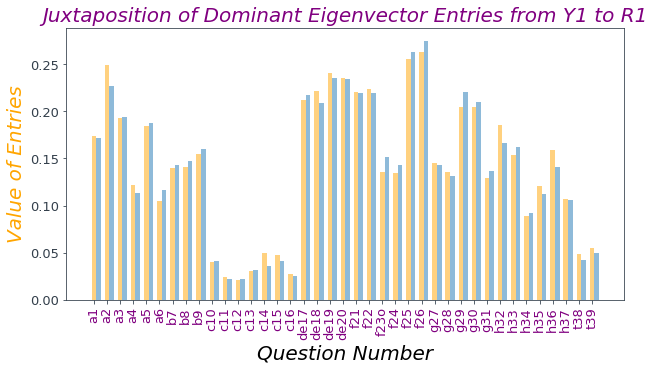

In [63]:
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(10,5))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries from Y1 to R1', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_Y1F),bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,abs(weiabs_Y1M),bar_width,alpha=0.5)

<BarContainer object of 39 artists>

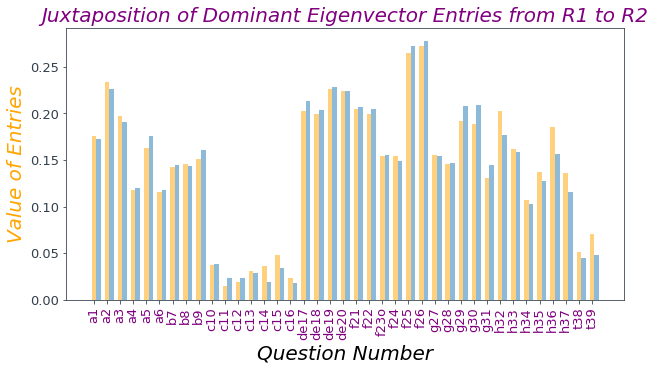

In [64]:
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(10,5))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries from R1 to R2', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_R1F),bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,abs(weiabs_R1M),bar_width,alpha=0.5)

<BarContainer object of 39 artists>

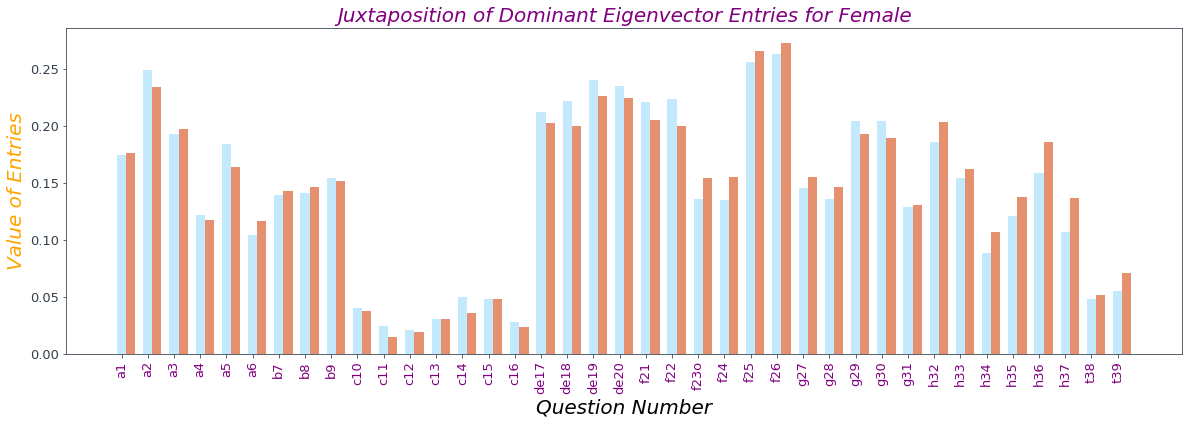

In [53]:
Year = ['Y1 to R1','R1 to R2']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries for Female', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_Y1F),bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,abs(weiabs_R1F),bar_width,color = '#df744a', alpha=0.8)

<BarContainer object of 39 artists>

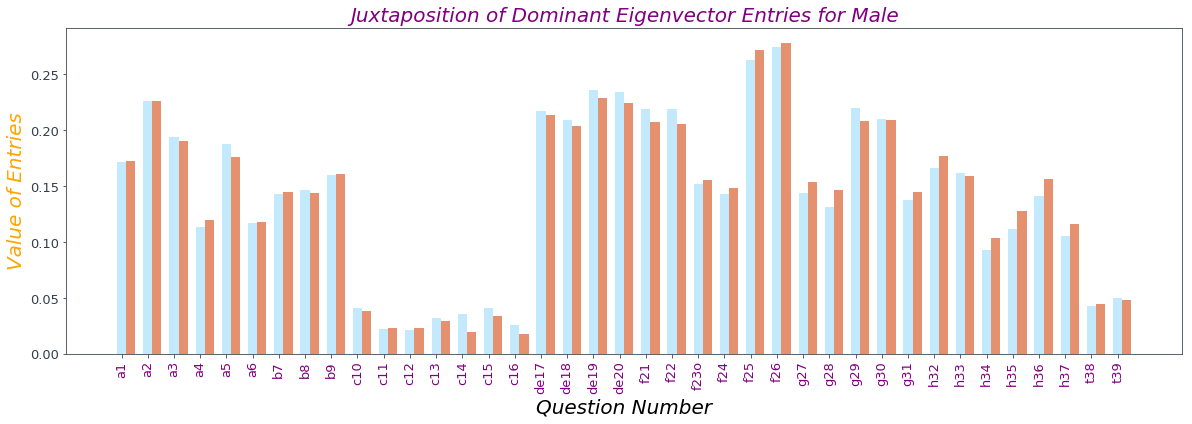

In [54]:
Year = ['Y1 to R1','R1 to R2']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries for Male', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_Y1M),bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,abs(weiabs_R1M),bar_width,color = '#df744a', alpha=0.8)